## Jak mierzyć rzeczy?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve, plot_roc_curve, plot_precision_recall_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

c:\users\beljasiak\appdata\local\programs\python\python39\lib\site-packages\pkg_resources\__init__.py:122: PkgResourcesDeprecationWarning: 0.0.07d6de2784363a81e65d5af245dc41b3e71eb65b5- is an invalid version and will not be supported in a future release
  warnings.warn(


## Przykład na danych

In [2]:
data = pd.read_csv("../data/adult.csv")

In [3]:
data.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Black,race_Other,race_White,sex_Male,native-country_Germany,native-country_Mexico,native-country_Philippines,native-country_United-States,native-country_other,pay_>50K
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [4]:
y = data["pay_>50K"]
X = data.drop("pay_>50K", axis = 1)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=420, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=420, test_size=0.125)

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
accuracy_score(y_train, rf.predict(X_train))

0.9999121844127332

Accuracy prawie 1, no to fajrant? Jak już dobrze wiemy, no nie do końca

Skuteczność mierzyliśmy na zbiorze treningowym, a co gorsza mamy niezbalansowane klasy

In [7]:
np.unique(data["pay_>50K"], return_counts=True)

(array([0, 1], dtype=int64), array([24698,  7839], dtype=int64))

Podstawowe accuracy dla tego modelu to ok 75%, bo tyle możemy uzyskać tworząc predykcje z samych zer

In [8]:
1 - data["pay_>50K"].mean()

0.7590742846605403

## Confussion matrix
Całkiem dobry [artykuł](https://en.wikipedia.org/wiki/Confusion_matrix) na wiki

Macierz błędów jest prostym narzędziem wizualizacji wyników zwracanych przez nasz model. Natomiast jest ona niejako punktem wyjściowym dla wielu innych metryk w przypadku klasyfikacji binarnej jak i wieloklasowej.

### Klasyfikacja binarna

In [9]:
y_true = [1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 0, 0]
cm_vals = confusion_matrix(y_true, y_pred)

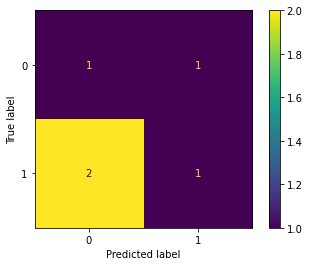

In [10]:
cm = ConfusionMatrixDisplay(cm_vals)
cm.plot()
plt.show()

In [11]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

### Klasyfikacja wieloklasowa

In [12]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cm_vals = confusion_matrix(y_true, y_pred)

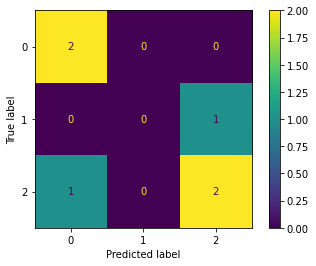

In [13]:
cm = ConfusionMatrixDisplay(cm_vals)
cm.plot()
plt.show()

In [14]:
confusion_matrix(y_true, y_pred).ravel()

array([2, 0, 0, 0, 0, 1, 1, 0, 2], dtype=int64)

# Często spotykane miary skuteczności modeli

## Klasyfikacja binarna

- accuracy
- balanced_accuracy 
- precision
- recall
- f1-score
- roc curve
- roc auc
- precision_recall_curve_auc
- jaccard
- matthews_corrcoef

## Klasyfikacja wieloklasowa
Większość z powyższych metryk da się zastosować też do problemów wieloklasowych, natomiast czasami, oznacza to konieczność zastosowania kilku modyfikacji jak np 'micro' i 'macro' dla recall

**top_k_accuracy**

użycie top k accuracy w artykule [ResNet](https://arxiv.org/pdf/1512.03385.pdf)

Natomias różnie podchodzi się do problemów klasyfikacji wieloklasowej i często same modele tworzy się w struktórach one vs rest, bądź one vs other

## Regresja 

- Mean Squared Error (MSE)
 $$\frac{1}{n}\sum^{n}_{i=1}\left(y_i - \hat y_i\right)^2$$
- Root Mean Squared Error (RMSE)
 $$\sqrt \frac{1}{n}\sum^{n}_{i=1}\left(y_i - \hat y_i\right)^2$$

- Mean Average Error (MAE)
 $$\frac{1}{n}\sum^{n}_{i=1}\left|y_i - \hat y_i\right|$$

- Mean Average Procentage Error (MAPE)
 $$\frac{1}{n}\sum^{n}_{i=1}\left|\frac{y_i - \hat y_i}{y_i}\right|$$
 
 
 i oczywiście wiele innych, nie jest rzadkim procesem definiowanie miar unikatowych dla problemu


### Zimplementujcie poniższe metryki

Polecam poszukać w internecie, albo w [dokumentacji](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) sklearn, albo w tej [pracy](https://arxiv.org/pdf/2008.05756.pdf).

In [15]:
def lab_recall_score(y_true, y_pred):
    pass
def lab_precission_score(y_true, y_pred):
    pass
def lab_f1_score(y_true, y_pred):
    pass
def lab_matthews_corrcoef(y_true, y_pred):
    pass

### Krzywa ROC

In [16]:
y_pred_proba = rf.predict_proba(X_test)

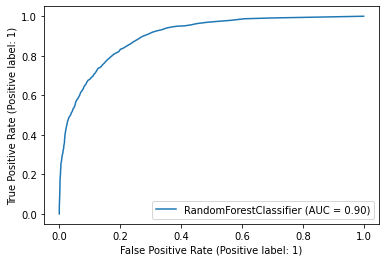

In [17]:
plot_roc_curve(rf, X_test, y_test)

### Spróbujmy sami zrozumieć co przedstawia krzywa ROC i ją stworzyć

In [18]:
def lab_plot_roc_curve(y_true, y_pred_proba):
    pass

dla chętnych dodatkowa funkcja

In [33]:
def lab_roc_auc_score(y_true, y_pred_proba):
    pass

## Funkcje strat (loss functions)

Trudno mówić o skutecznosci modeli bez wspomnienia funkcji, które probują one zminimalizować. Większośc modeli, jest tworzona by minimalizować pewną funkcję opisującą jakiegoś rodzaju błąd predykcji.

Każdy model, to nieco inna próba matymatycznego opisu konkretnego problemu. Czasami próbująca rozwiązać konkretny problem świata fizycznego badź usprawnić własność innego modelu.

Przykład z [SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

### Przykłady

 MNK -> Lasso i Ridge
 
 Drzewa decyzyjne -> Lasy losowe -> XGBoost
 
 LDA -> QDA
 
 Ale również w sieciach neuronowych
 
 [Autoencoders](https://www.tensorflow.org/tutorials/generative/autoencoder) -> [Variational Autoencoders](https://arxiv.org/abs/1312.6114) (VAE) -> [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661) (GAN)
 
 

## Modele gradientowe

Podobnie ale nieco inaczej wygląda to w modelach gradientowych, które z definicji próbują zminimalizować zdefiniowaną jasno funkcje, która z musi być wypukła i różniczkowalna. Poznaliśmy jeden z modeli wykorzystujący gradient i był to [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html#learning-task-parameters)

Jest wiele różnych metod optymalizacji wykorzystującej gradienty, Stochastic Gradient Descent, Adam, AdaGrad itd, długo by wymieniać. Natomiast wszystkich można użyć z dowolną funkcją strat i jej gradientem, o ile on istnieje i jesteśmy w stanie go policzyć.

### Przykład funkcji celu dla klasycznego GANa
Dwa obiekty generator $G$ i discriminator $D$. Gdzie generator próbuję zminimalizować poniższą funkcję, natomiast discriminator zmaksymalizować.

$$E_x[log(D(x))] + E_z[log(1-D(G(z)))]$$

$D(x)$ to predykcja discriminatora, $G(z)$ to wygenerowany z szumu obraz

Czy jest to łatwy problem do optymalizacji? Jak najbardziej, nie natomiast jeżeli rozwiąże się go dobrze, to można uzyskać [ładne zdjęcia](https://github.com/NVlabs/stylegan2) i [różne rzeczy, które nie istnieją](https://thisxdoesnotexist.com/).

### Co natomiast zrobić gdy nie możemy uzyskać gradientu?
Pozostawiam do zastanowienia

## Strojenie hiperparametrów

### Domyślny las losowy

In [19]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [20]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
def plot_cm_and_recall(model, X_train, X_test, y_train, y_test):
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred_test)
    
    fig, axs = plt.subplots(ncols=2)
    cm = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train))
    cm.plot(colorbar=False, ax=axs[0])
    axs[0].set_title(f"Train (recall {train_recall:.03f})")
    
    cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
    cm.plot(colorbar=False, ax=axs[1])
    axs[1].set_title(f"Test (recall {test_recall:.03f})")
    plt.show()
    

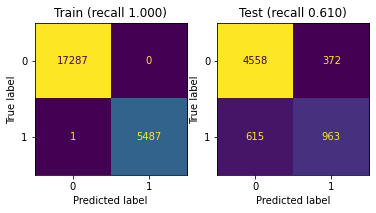

In [22]:
plot_cm_and_recall(rf, X_train, X_test, y_train, y_test)

### Spróbujmy znaleźc lepsze hiperparametry

In [23]:
search_space = {"max_depth": [None, 2, 4, 8, 10],
               "n_estimators": [10,20,50,100],
               "class_weight": [None, "balanced", "balanced_subsample"]}

In [24]:
rf2 = RandomForestClassifier(n_jobs=-1)

## Random Serach

In [25]:
rscv = RandomizedSearchCV(rf2, search_space, scoring="recall", verbose = 2, n_jobs=-1)

In [26]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 100]},
                   scoring='recall', verbose=2)

In [27]:
rscv.best_params_

{'n_estimators': 100, 'max_depth': 8, 'class_weight': 'balanced_subsample'}

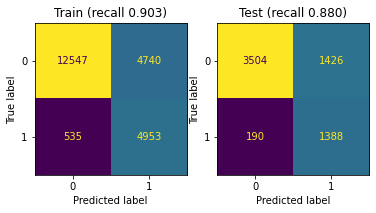

In [28]:
plot_cm_and_recall(rscv.best_estimator_, X_train, X_test, y_train, y_test)

### Grid Search

In [29]:
gscv = GridSearchCV(rf2, search_space, scoring="recall", verbose = 2, n_jobs=-1)

In [30]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [None, 2, 4, 8, 10],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='recall', verbose=2)

In [31]:
gscv.best_params_

{'class_weight': 'balanced_subsample', 'max_depth': 8, 'n_estimators': 10}

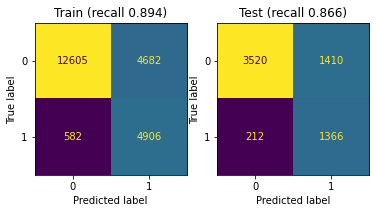

In [32]:
plot_cm_and_recall(gscv.best_estimator_, X_train, X_test, y_train, y_test)